In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")
df_ref = pd.read_csv("data/lof/data-lof-2024-04-29.csv")

In [3]:
df = pd.read_csv("data/knn/data-knn-2024-05-06.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134925 entries, 0 to 134924
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        134925 non-null  int64  
 1   id_mls                    134925 non-null  object 
 2   bathrooms_total           134925 non-null  float64
 3   bedrooms_extra            134925 non-null  float64
 4   bedrooms                  134925 non-null  float64
 5   stories_total             134925 non-null  float64
 6   size_interior             134925 non-null  float64
 7   building_type             134925 non-null  object 
 8   agency_name               134925 non-null  object 
 9   agency_type               134925 non-null  object 
 10  property_type             134925 non-null  object 
 11  lng                       134925 non-null  float64
 12  lat                       134925 non-null  float64
 13  ownership_type            134925 non-null  o

In [5]:
df["province"].value_counts()

province
Ontario                    63954
British Columbia           29781
Alberta                    18524
Quebec                      8570
Saskatchewan                5223
Manitoba                    3987
Nova Scotia                 2249
New Brunswick               1568
Prince Edward Island         462
Newfoundland & Labrador      445
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

In [6]:
df["province"].value_counts()

province
Ontario                    63954
British Columbia           29781
Alberta                    18524
Quebec                      8570
Saskatchewan                5223
Manitoba                    3987
Nova Scotia                 2249
New Brunswick               1568
Prince Edward Island         462
Newfoundland & Labrador      445
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

In [7]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [8]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       63954.0
mean       920515.0
std        528369.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1098000.0
max      10995000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

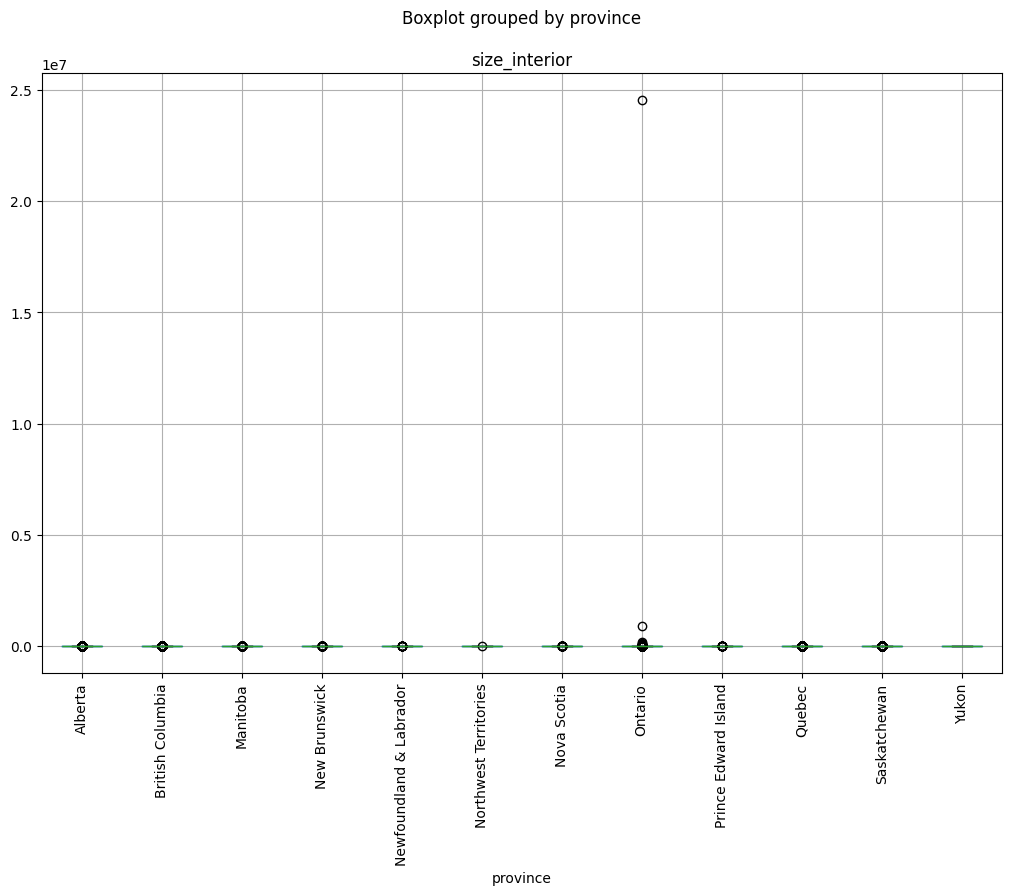

In [9]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [10]:
q0 = 0
q25 = df_init["size_interior"].quantile(0.25)
q75 = df_init["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

abs(q25-q0)*0.33

335.94

<Axes: title={'center': 'size_interior'}, xlabel='province'>

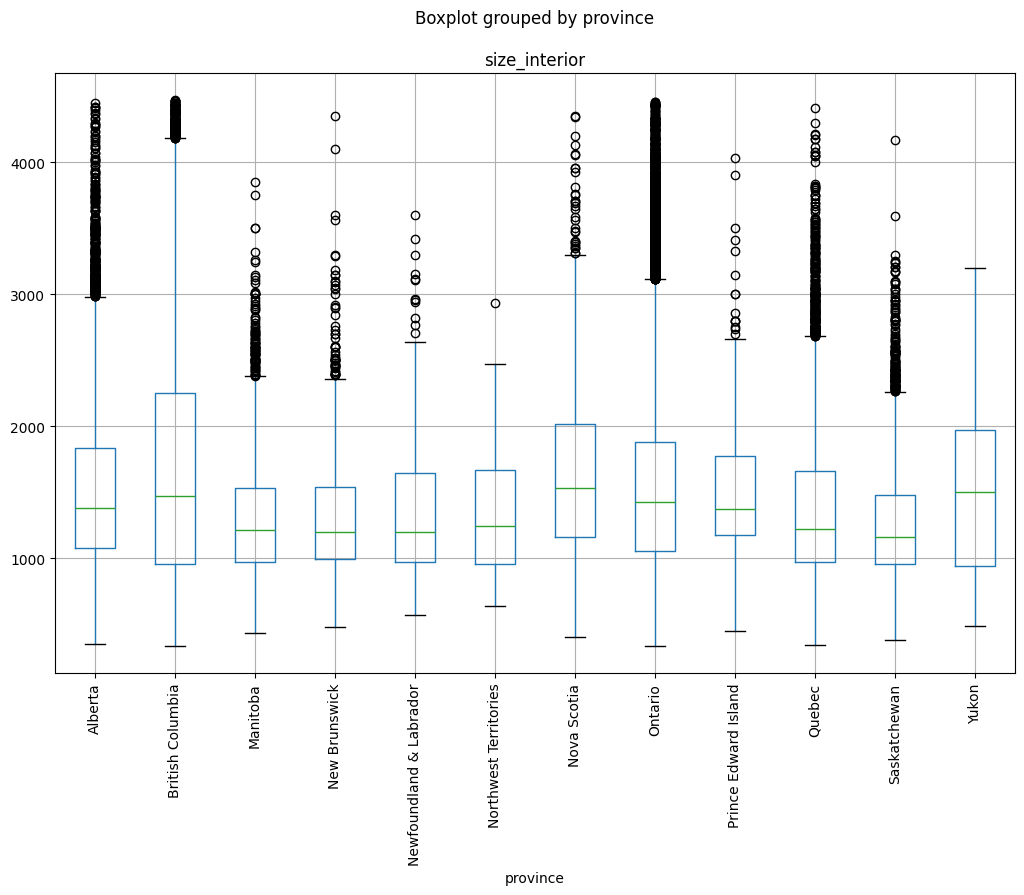

In [11]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

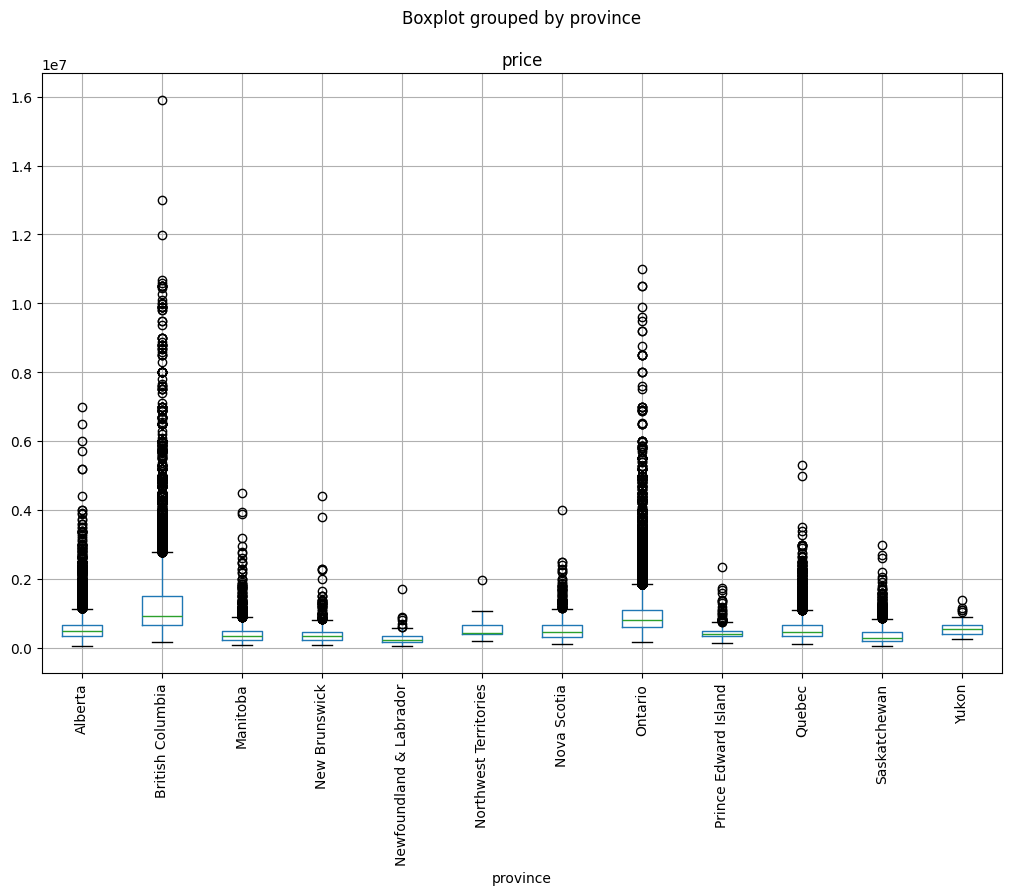

In [12]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [13]:
df["province"].value_counts()

province
Ontario                    63668
British Columbia           29737
Alberta                    18519
Quebec                      8539
Saskatchewan                5222
Manitoba                    3987
Nova Scotia                 2248
New Brunswick               1568
Prince Edward Island         461
Newfoundland & Labrador      445
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

In [14]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       63668.0
mean       920717.0
std        527992.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1098000.0
max      10995000.0
Name: price, dtype: float64

# Anomaly Reduction

In [15]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [16]:
# Detect anomalies on the new dataset based on the previous dataset
lof = LocalOutlierFactor(n_neighbors=10, novelty=True)
scaler = StandardScaler()

df_ref_scaled = scaler.fit_transform(df_ref[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
df_scaled = scaler.transform(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# lof_labels = lof.fit_predict(df_scaled)
# df = df[lof_labels==1]

# lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# df = df[lof_labels==1]

lof.fit(df_ref_scaled)

lof_labels = lof.predict(df_scaled)

df = df[lof_labels==1]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

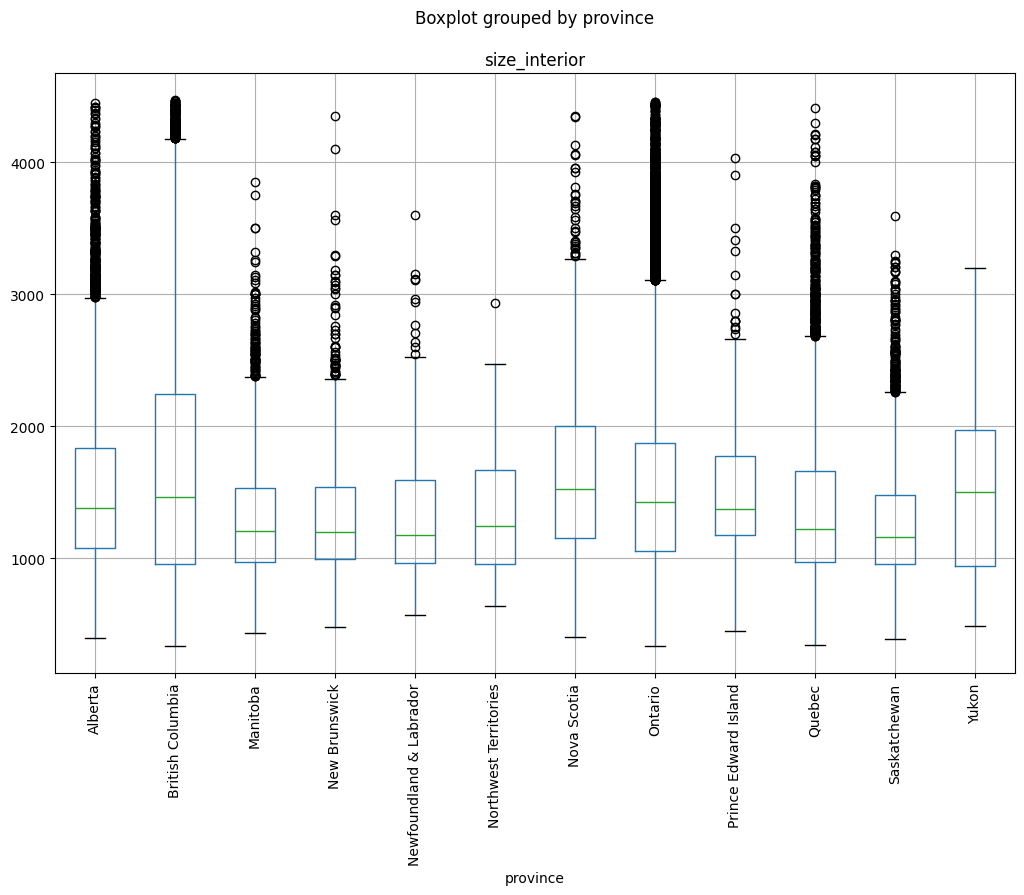

In [17]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132786 entries, 0 to 134924
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        132786 non-null  int64  
 1   id_mls                    132786 non-null  object 
 2   bathrooms_total           132786 non-null  float64
 3   bedrooms_extra            132786 non-null  float64
 4   bedrooms                  132786 non-null  float64
 5   stories_total             132786 non-null  float64
 6   size_interior             132786 non-null  float64
 7   building_type             132786 non-null  object 
 8   agency_name               132786 non-null  object 
 9   agency_type               132786 non-null  object 
 10  property_type             132786 non-null  object 
 11  lng                       132786 non-null  float64
 12  lat                       132786 non-null  float64
 13  ownership_type            132786 non-null  object

In [19]:
df["province"].value_counts()

province
Ontario                    62579
British Columbia           29541
Alberta                    18237
Quebec                      8453
Saskatchewan                5184
Manitoba                    3957
Nova Scotia                 2218
New Brunswick               1563
Prince Edward Island         461
Newfoundland & Labrador      431
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

In [20]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       62579.0
mean       919016.0
std        527409.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1095000.0
max      10995000.0
Name: price, dtype: float64

In [21]:
df.to_csv("data/lof/data-lof-2024-05-06.csv", index=False)